# WAV Gallery

## By: Austin Anderson

The purpose of this notebook is to display various images of audio data in their different forms. It starts with a telephone dialing example with 5-9-1 pressed. The Time and Frequency (FFT) representations before moving on to spectrograms (STFT). Lastly, I go through some examples of the classes in the dataset, including one with the padding issue! Unlike the WAV Practice notebook, this notebook does have the proper plot parameters.

#### Importing Libraries

In [1]:
import librosa as lr
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
import librosa.display

### Setting Configurations!

In [249]:
configs = {}
configs['sampling_rate'] = 22050
configs['duration'] = 4
configs['hop_length'] = 882 # 20ms
configs['fmin'] = 20
configs['fmax'] = configs['sampling_rate'] // 2
configs['n_mels'] = 128
configs['n_fft'] = configs['n_mels'] * 20
configs['samples'] = configs['sampling_rate'] * configs['duration']
configs['dims'] = (configs['n_mels'], 1 + int(np.floor(configs['samples']/configs['hop_length'])), 1)

In [171]:
def frequency_sepectrum(x, sf):
    """
    Derive frequency spectrum of a signal from time domain
    :param x: signal in the time domain
    :param sf: sampling frequency
    :returns frequencies and their content distribution
    """
    x = x - np.average(x)  # zero-centering

    n = len(x)
    print(n)
    k = arange(n)
    tarr = n / float(sf)
    frqarr = k / float(tarr)  # two sides frequency range

    frqarr = frqarr[range(n // 2)]  # one side frequency range

    x = fft(x) / n  # fft computing and normalization
    x = x[range(n // 2)]

    return frqarr, abs(x)

# 5-9-1 Digit Dialing Example

[Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Time (s)')]

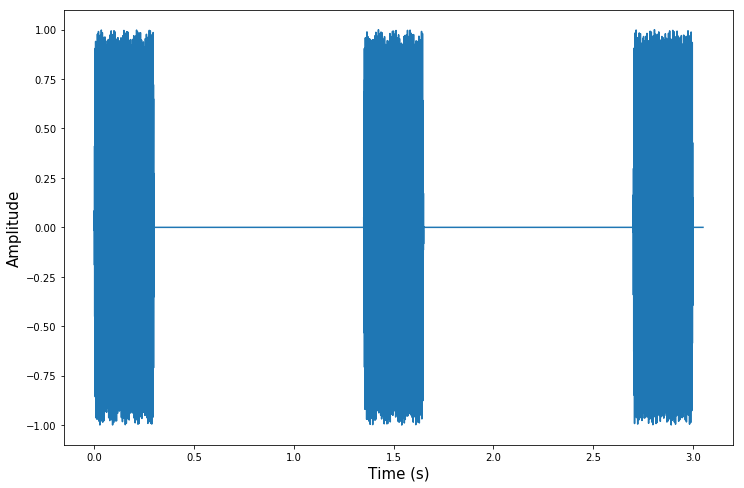

In [172]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\5P9P1.wav",
                      sr=8000)
time = np.arange(0, len(audio)) / sfreq

plt.rcParams["axes.labelsize"] = 15
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Amplitude')


In [173]:
IPython.display.Audio(data=audio, rate=sfreq)

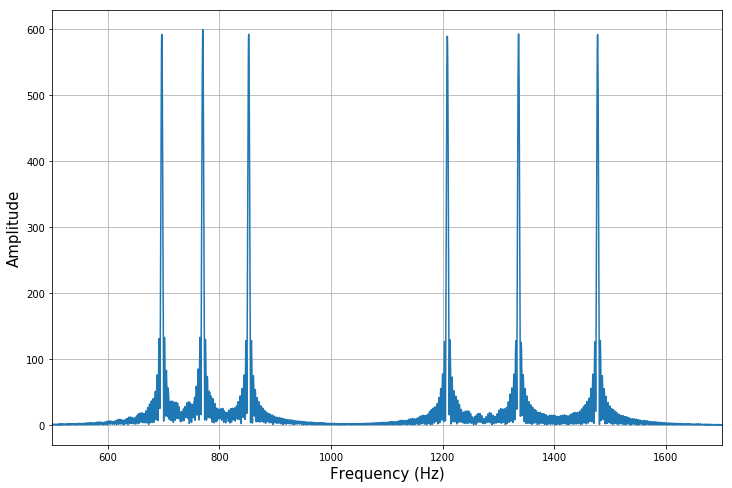

In [174]:
from scipy.fftpack import fft,fftfreq
from scipy.io import wavfile # get the api

fs, data = wavfile.read(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\5P9P1.wav") # load the data

samples = data.shape[0]


datafft = fft(audio)
#Get the absolute value of real and complex component:
fftabs = abs(datafft)
freqs = fftfreq(samples,1/fs)
plt.figure(figsize=(12,8))
plt.xlim( [10, fs/2] )
plt.grid( True )
plt.xlim((500, 1700))
plt.xlabel( 'Frequency (Hz)' )
plt.ylabel('Amplitude')
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.rcParams["axes.labelsize"] = 12

# 5 9 1

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

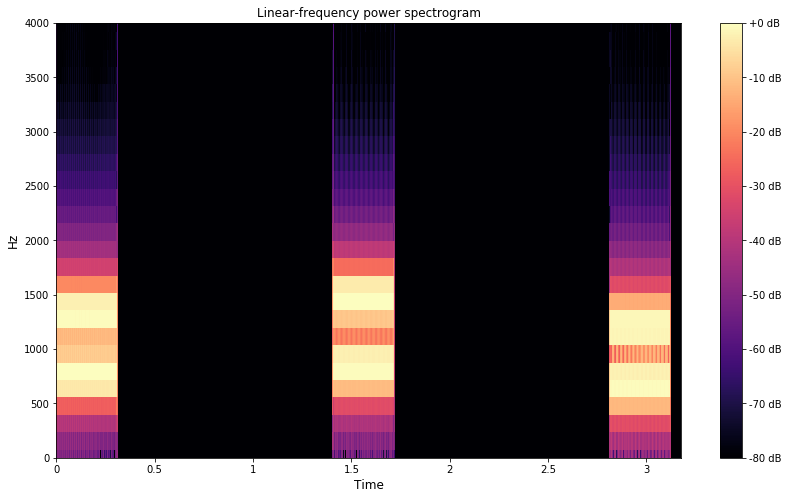

In [181]:
plt.figure(figsize=(14,8))
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=50)), ref=np.max)
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 8000, hop_length = 50/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

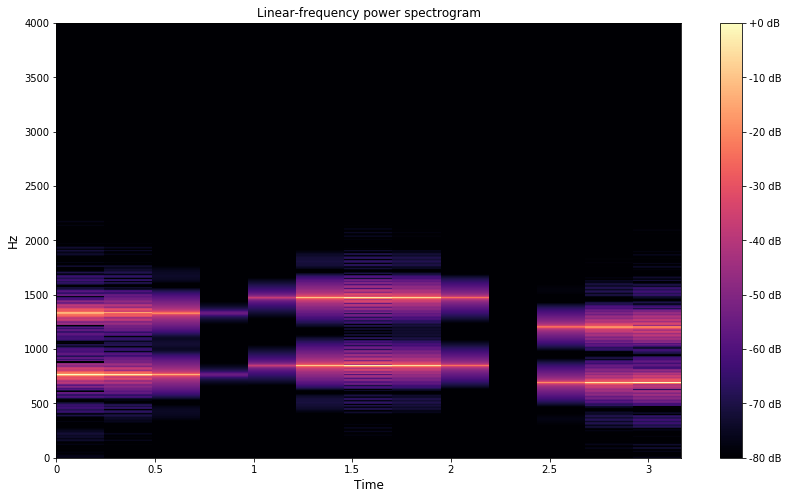

In [182]:
plt.figure(figsize=(14,8))
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=7800)), ref=np.max)
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 8000, hop_length=7800/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# Gunshot + Padding Example

In [251]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\practice\fold1\7061-6-0-0.wav",
                      sr = 22050)

In [252]:
IPython.display.Audio(data=audio, rate=sfreq)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

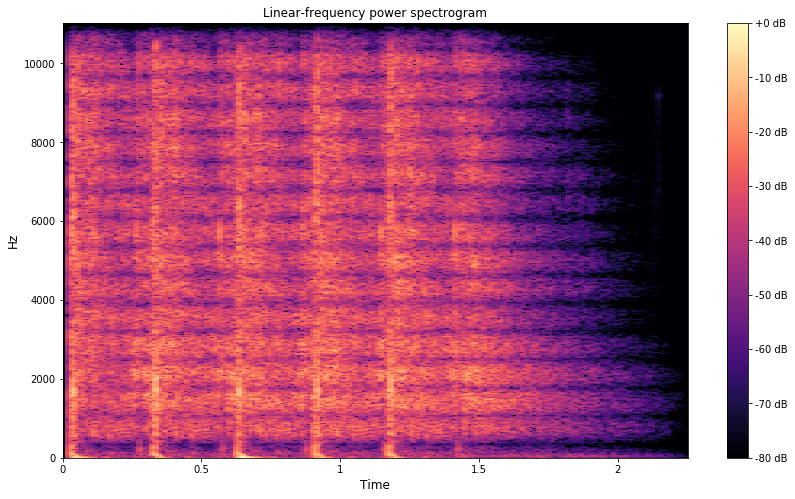

In [254]:
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=1024)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 22050, hop_length = 1024/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

38587
19293


Text(0.5, 1.0, 'Linear-frequency power spectrogram')

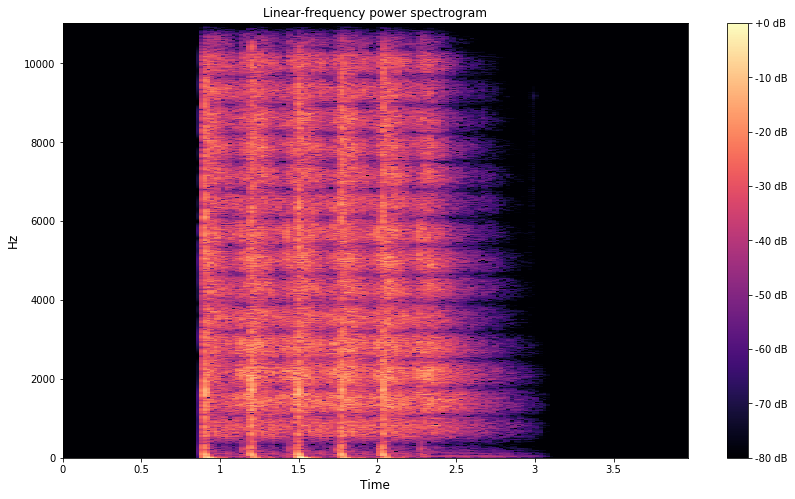

In [258]:
padding = configs['samples'] - len(audio)
print(padding)
offset = padding // 2
print(offset)

padded_audio = np.pad(audio, (offset, configs['samples'] - len(audio) - offset), 'constant')

D = librosa.amplitude_to_db(np.abs(librosa.stft(padded_audio)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 22050, hop_length = 2024/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# Accordian

In [188]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\practice\fold1\21684-9-0-30.wav",
                      sr = 22050)

In [189]:
IPython.display.Audio(data=audio, rate=sfreq)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

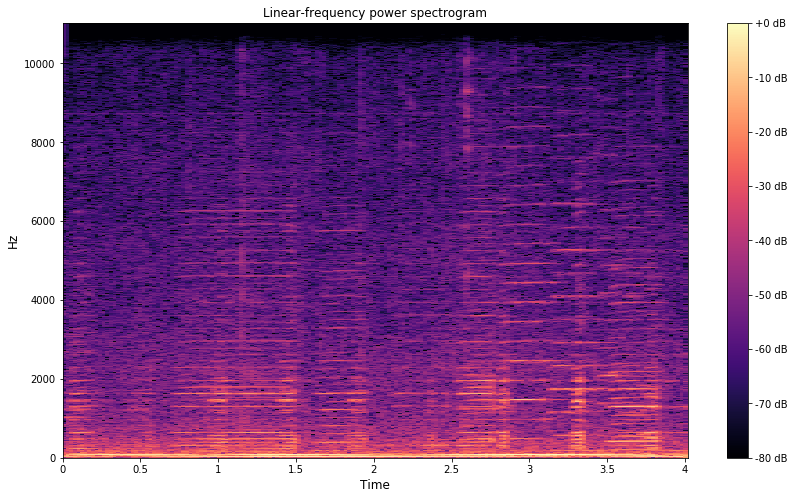

In [190]:
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=2048)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 22050, hop_length = 2048/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [191]:
np.shape(D)

(1025, 173)

In [192]:
S = lr.feature.melspectrogram(y=audio, sr=sfreq, n_mels=128,
fmax=sfreq//2)

In [193]:
np.shape(S)

(128, 173)

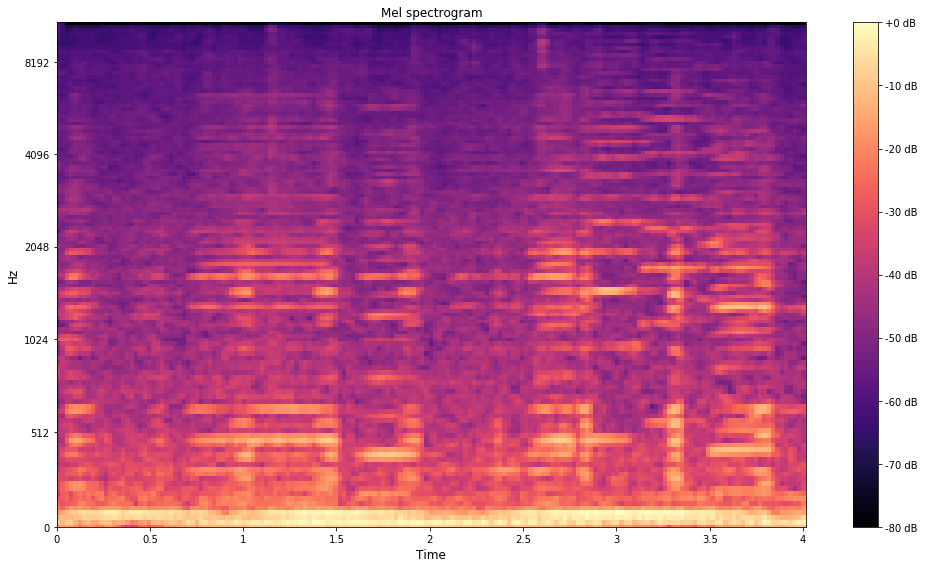

In [194]:
plt.figure(figsize=(14, 8))
lr.display.specshow(lr.power_to_db(S, ref=np.max),
y_axis='mel', fmax=sfreq/2, hop_length = 2048/4,
x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

# Siren

In [259]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\practice\fold1\157867-8-0-12.wav")

In [260]:
IPython.display.Audio(data=audio, rate=sfreq)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

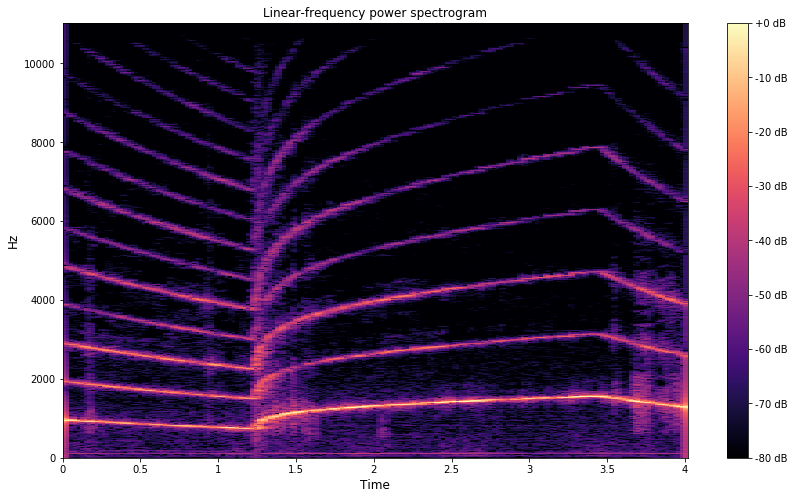

In [262]:
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=2048)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 22050, hop_length = 2048/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [263]:
S = lr.feature.melspectrogram(y=audio, sr=sfreq, n_mels=128,
fmax=sfreq//2)

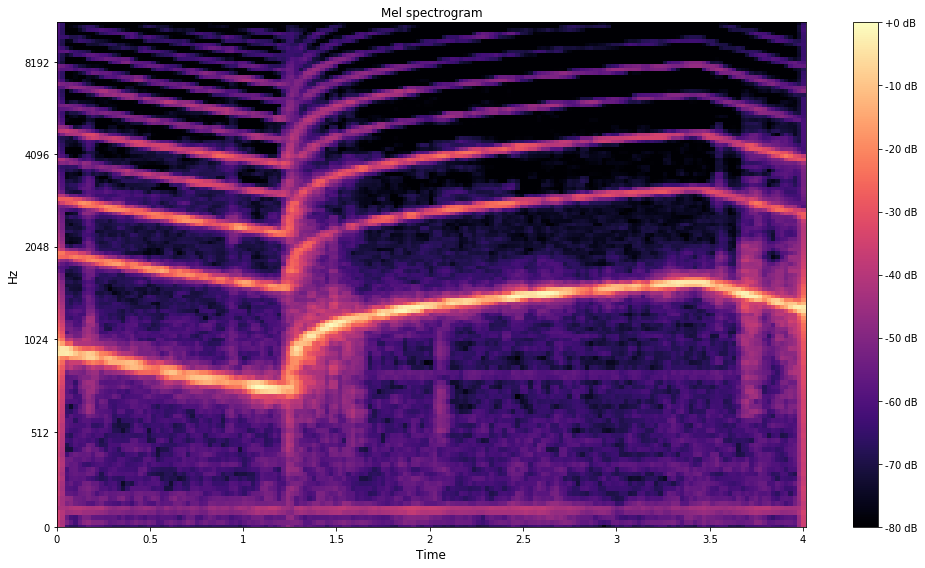

In [265]:
plt.figure(figsize=(14, 8))
lr.display.specshow(lr.power_to_db(S, ref=np.max),
y_axis='mel', fmax=sfreq/2, hop_length = 2048/4,
x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

# Children

In [266]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\practice\fold1\108362-2-0-9.wav")

In [267]:
IPython.display.Audio(data=audio, rate=sfreq)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

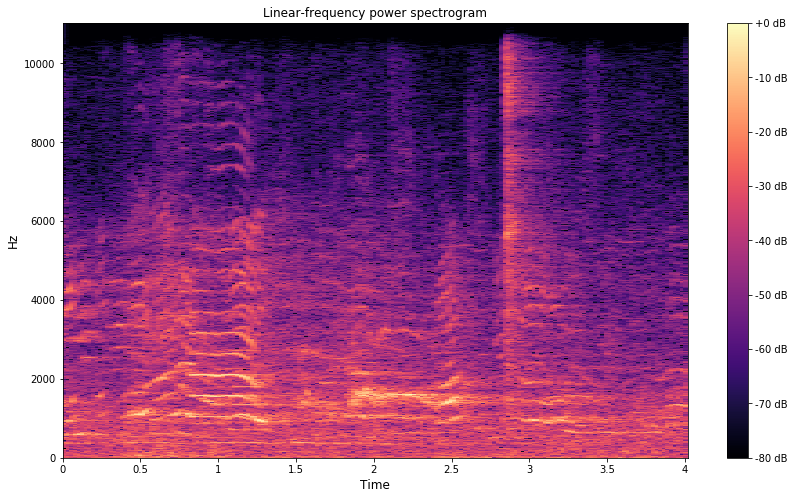

In [268]:
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=2048)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 22050, hop_length = 2048/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

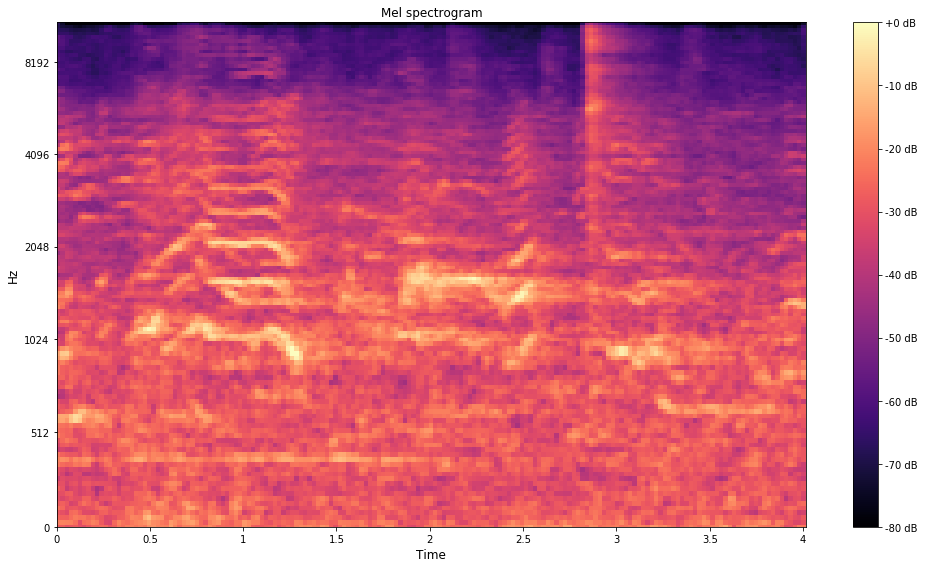

In [269]:
S = lr.feature.melspectrogram(y=audio, sr=sfreq, n_mels=128,
fmax=sfreq//2)

plt.figure(figsize=(14, 8))
lr.display.specshow(lr.power_to_db(S, ref=np.max),
y_axis='mel', fmax=sfreq/2, hop_length = 2048/4,
x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

# Dog Bark

In [238]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\practice\fold1\7383-3-0-1.wav")

In [239]:
IPython.display.Audio(data=audio, rate=sfreq)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

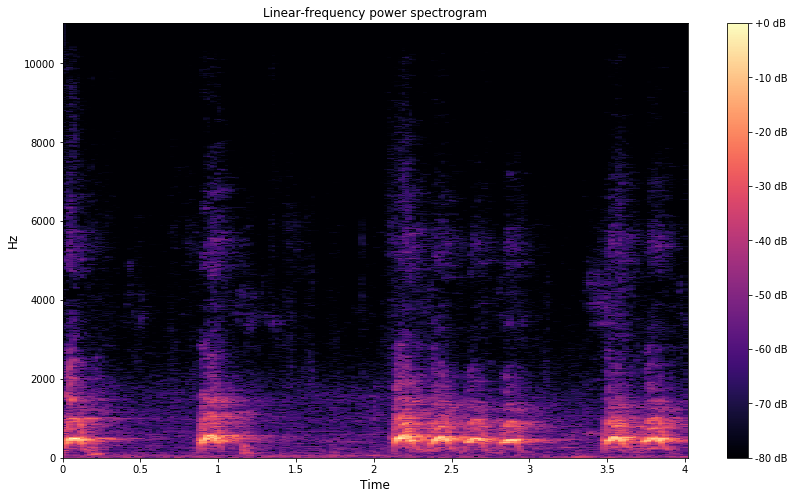

In [240]:
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=2048)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 22050, hop_length = 2048/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

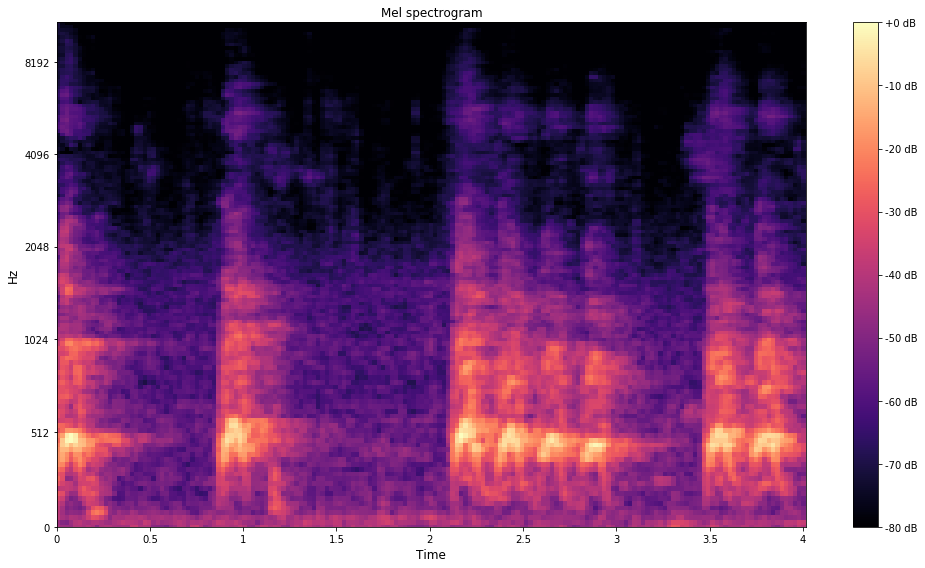

In [241]:
S = lr.feature.melspectrogram(y=audio, sr=sfreq, n_mels=128,
fmax=sfreq//2)

plt.figure(figsize=(14,8))
lr.display.specshow(lr.power_to_db(S, ref=np.max),
y_axis='mel', fmax=sfreq/2, hop_length = 2048/4,
x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

# Air Conditioner

In [208]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\practice\fold1\113205-5-1-4.wav")

In [209]:
IPython.display.Audio(data=audio, rate=sfreq)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

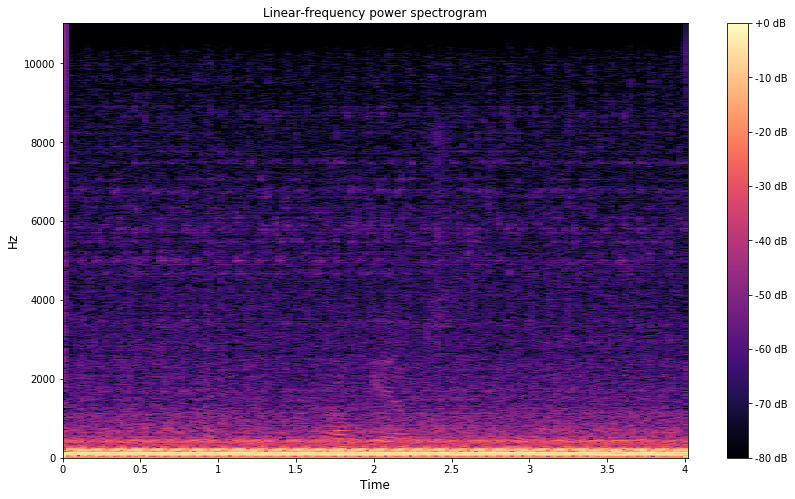

In [210]:
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=2048)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 22050, hop_length = 2048/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

another air conditioner???

In [211]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\practice\fold1\57320-0-0-15.wav")

In [212]:
IPython.display.Audio(data=audio, rate=sfreq)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

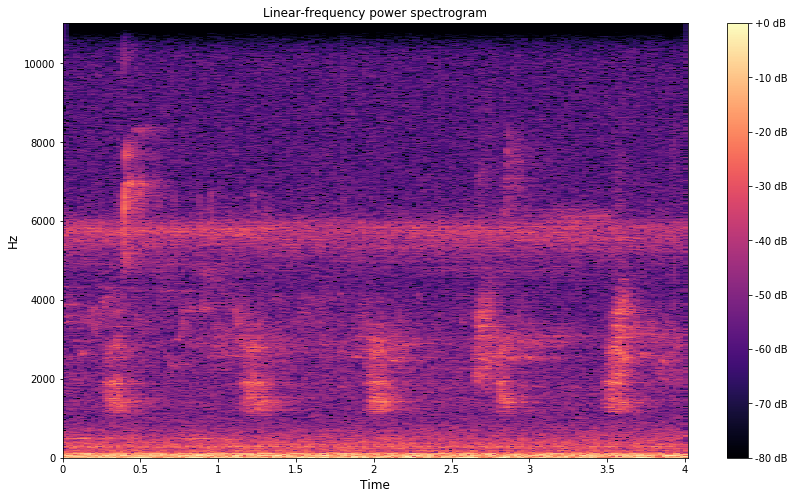

In [213]:
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=2048)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 22050, hop_length = 2048/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# Drill

In [226]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\practice\fold1\17913-4-1-0.wav")

In [227]:
IPython.display.Audio(data=audio, rate=sfreq)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

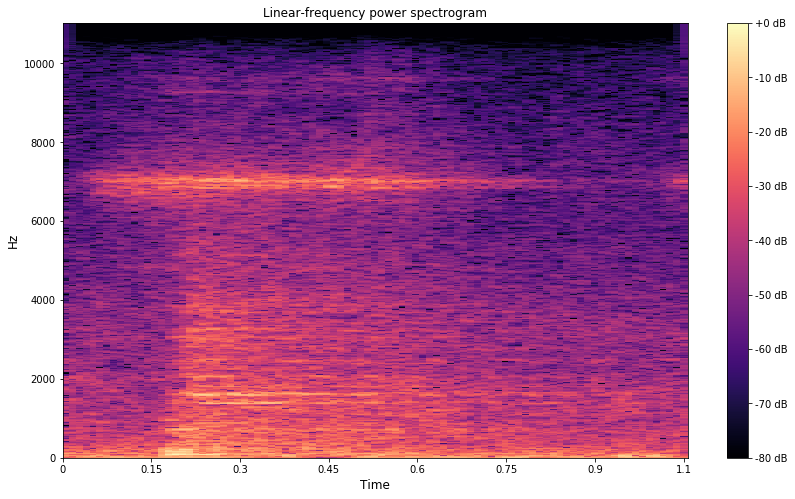

In [231]:
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=1024)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 22050, hop_length = 1024/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Okay, a different drill...

In [233]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\practice\fold1\147764-4-7-0.wav")

In [234]:
IPython.display.Audio(data=audio, rate=sfreq)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

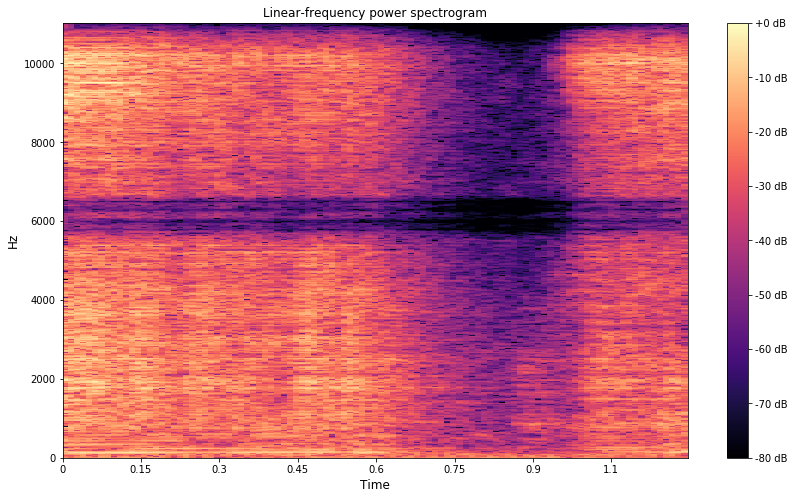

In [237]:
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=1024)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 22050, hop_length = 1024/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# Jackhammer

In [242]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\practice\fold1\119455-5-0-6.wav")

In [243]:
IPython.display.Audio(data=audio, rate=sfreq)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

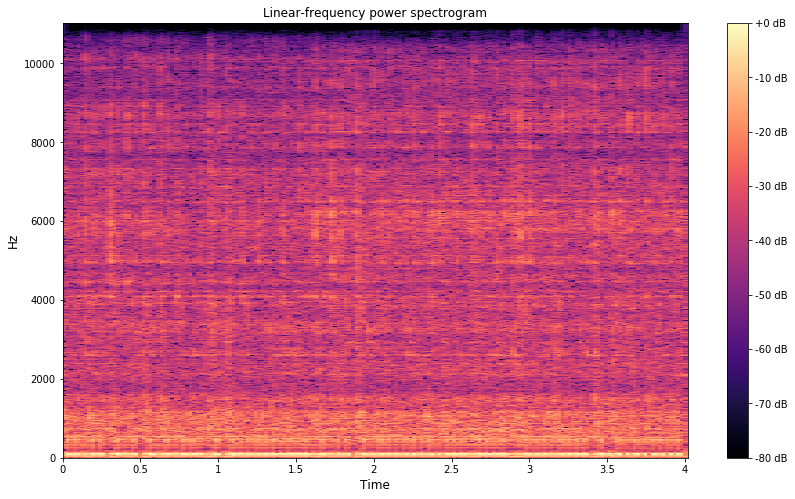

In [244]:
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=2048)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 22050, hop_length = 2048/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

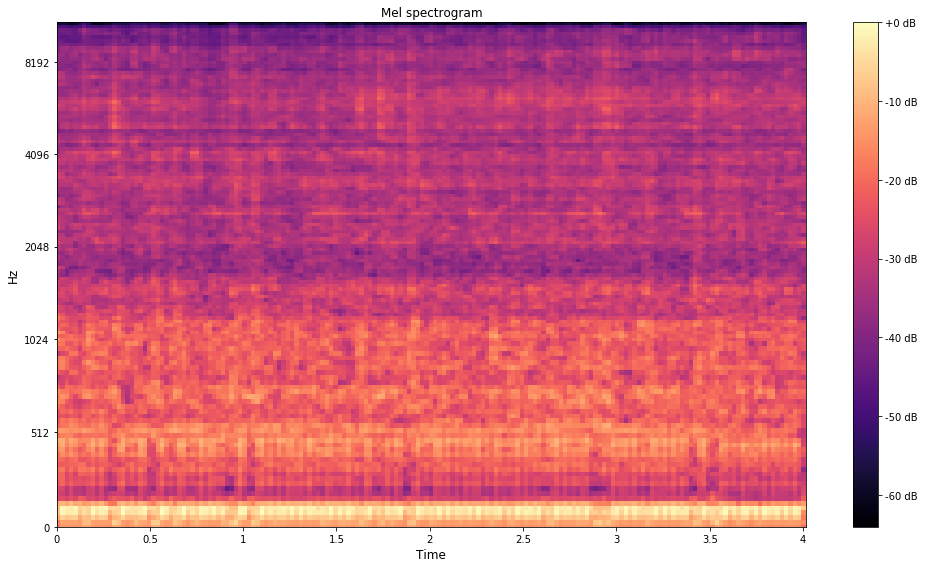

In [245]:
S = lr.feature.melspectrogram(y=audio, sr=sfreq, n_mels=128,
fmax=sfreq//2)

plt.figure(figsize=(14,8))
lr.display.specshow(lr.power_to_db(S, ref=np.max),
y_axis='mel', fmax=sfreq/2, hop_length = 2048/4,
x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

# Violin

In [274]:
#audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\Presentation\violin.wav",
#                      sr = 44100, duration = 4.0)

#librosa.output.write_wav('violin_trim.wav', audio, sfreq)

In [281]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\Presentation\violin_trim.wav",
                      sr = 44100)

In [282]:
IPython.display.Audio(data=audio, rate=sfreq)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

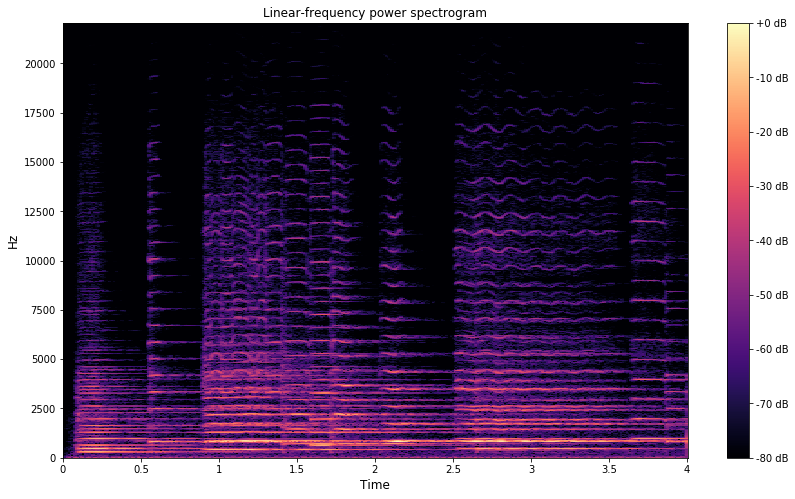

In [283]:
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=2048)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 44100, hop_length = 2048/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [292]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\Presentation\violin_trim.wav",
                      sr = 22050)

In [293]:
IPython.display.Audio(data=audio, rate=sfreq)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

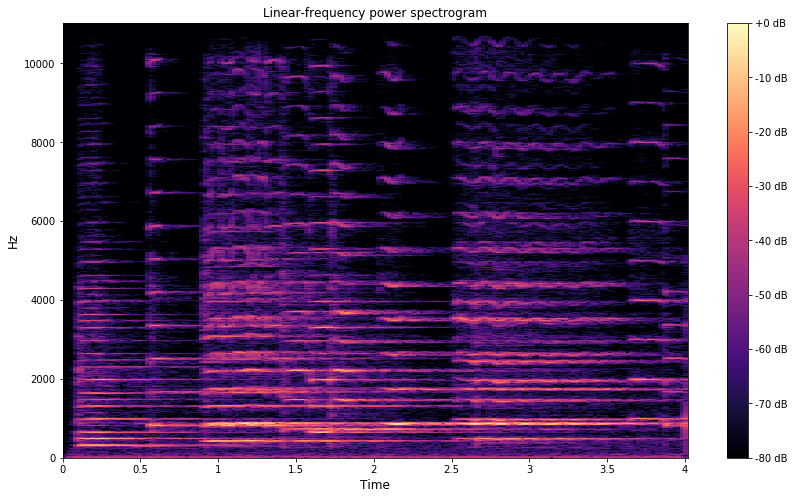

In [294]:
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=2048)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 22050, hop_length = 2048/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [310]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\Presentation\violin_trim.wav",
                      sr = 11025)

In [311]:
IPython.display.Audio(data=audio, rate=sfreq)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

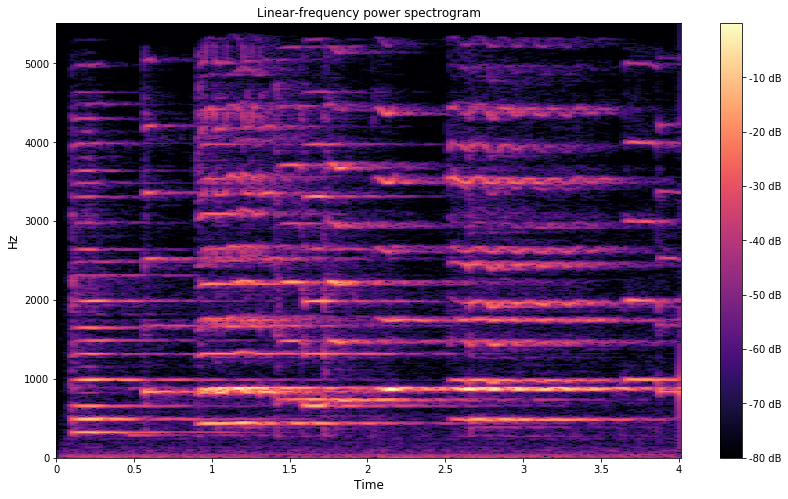

In [312]:
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=1024)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 11025, hop_length = 1024/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [306]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\Presentation\violin_trim.wav",
                      sr = 5500)

In [307]:
IPython.display.Audio(data=audio, rate=sfreq)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

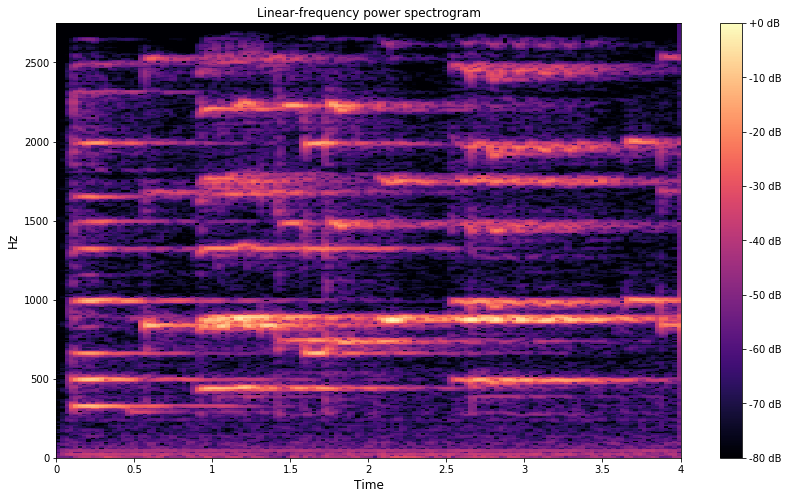

In [309]:
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=612)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 5500, hop_length = 612/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# YES soundfile

In [223]:
audio, sfreq = lr.load(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj_Speech\data_speech_commands_v0.02.tar\data_speech_commands_v0.02\yes\0cb74144_nohash_3.wav",
                      sr=16000)


Text(0.5, 1.0, 'Linear-frequency power spectrogram')

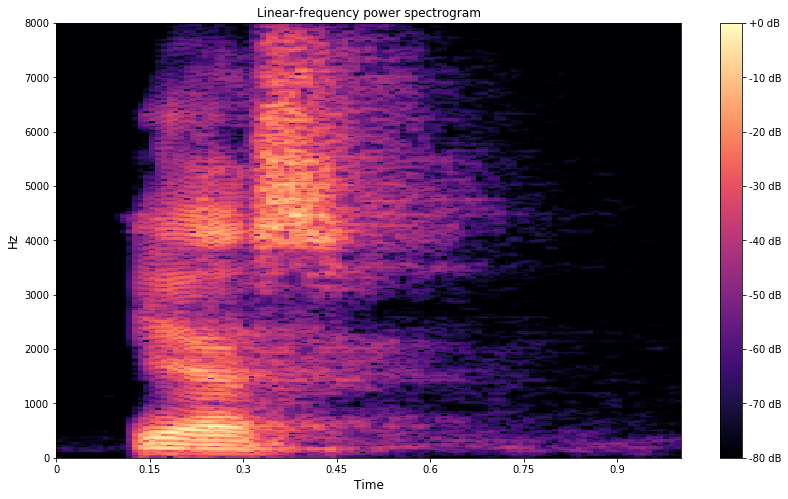

In [224]:
D = lr.amplitude_to_db(np.abs(lr.stft(audio, n_fft=600)), ref=np.max)
plt.figure(figsize=(14,8))
lr.display.specshow(D, y_axis='linear', x_axis='time', sr = 16000, hop_length = 600/4)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

#### Reminder how to store all wav files in a directory

In [ ]:
data_dir = r"D:/Machine_Learning/UrbanSound8K/UrbanSound8K/audio/fold1"

audio_files = glob(data_dir + '/*.wav')

#### Another way to plot FFTs, but didn't work as well

In [ ]:
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
fs, data = wavfile.read(r"C:\Users\Austin\Documents\Academics\NCF\Semester_2\Machine_Learning\Final_Proj\UrbanSound8K\UrbanSound8K\5P9P1.wav") # load the data

a = data.T # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = int(len(c)/2)  # you only need half of the fft list (real signal symmetry)
k = np.arange(len(data))
T = len(data)/fs  # where fs is the sampling frequency
frqLabel = k/T 

plt.plot(abs(c[1:(d-1)]),'r')
plt.show()